In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import sequence
import simplejson as json
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn import metrics as skmetrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils.vis_utils import plot_model
from keras import metrics
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input, Dropout, Embedding, concatenate
from keras.utils.vis_utils import plot_model
from google.cloud import storage
from google.cloud.storage import Blob

client = storage.Client(project="ds5500")

bucket = client.get_bucket("kkbox-data")

#INPUT_PATH = "D:\\Northeastern\\100 pct undersample split\\"
INPUT_PATH = "gs://kkbox-data/data_100_pct_undersample/"

Using TensorFlow backend.


# Load Data

In [3]:
X_members = pd.read_csv(INPUT_PATH + "X_train_transformed.csv").drop(["msno"],axis=1).values
y_flat = pd.read_csv(INPUT_PATH + "y_train.csv", header=None).drop([0],axis=1).values.ravel()

# SKLearn Logistic Regression

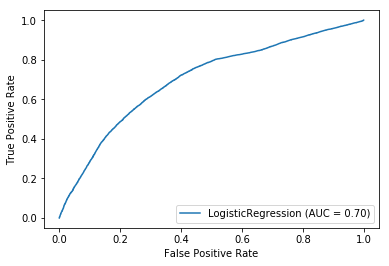

In [4]:
fit = LogisticRegression(random_state=0).fit(X_members, y_flat)
y_pred = fit.predict(X_members)
accuracy_score(y_flat, y_pred)
skmetrics.plot_roc_curve(fit, X_members,y_flat)

# Keras LR

In [5]:
batch_size = 128
epochs = 10
features = X_members.shape[1]

data_in = Input(shape = (features,))
x = Dense(1, activation='softmax')(data_in)
model = Model(inputs=data_in, outputs=x)
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = [metrics.binary_accuracy])
model.summary()
model.fit(X_members, y_flat, batch_size=batch_size, epochs=epochs,verbose=1)

#Calculate AUC
y_pred = model.predict(X_members).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_flat, y_pred)
auc(fpr_keras, tpr_keras)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 27)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
24798/24798 [==============================] - 0s 14us/step - loss: 7.6481 - binary_accuracy: 0.5012
Epoch 2/10
24798/24798 [==============================] - 0s 11us/step - loss: 7.6481 - binary_accuracy: 0.5012
Epoch 3/10
24798/24798 [==============================] - 0s 11us/step - loss: 7.6481 - binary_accuracy: 0.5012
Epoch 4/10
24798/24798 [==============================] - 0s 11us/step - loss: 7.6481 - binary_accuracy: 0.5012
Epoch 5/10
24798/24798 [==============================] - 0s 10us/step - loss

0.5